In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the data
file_path = "data-export[1].csv"  # Replace with your dataset path


In [4]:
df = pd.read_csv(file_path)


In [7]:

df["DateHour"] = pd.to_datetime(df["Date"] + " " + df["Hour"].astype(str) + ":00:00", dayfirst=True)


In [9]:

df.rename(columns={
    "Session primary channel group (Default channel group)": "Channel Group",
    "Average engagement time per session": "Average engagement time per session",
    "Engaged sessions per user": "Engaged sessions per user",
    "Events per session": "Events per session",
    "Engagement rate": "Engagement rate",
    "Event count": "Event count",
    "Engaged sessions": "Engaged sessions",
    "Sessions": "Sessions",
    "Users": "Users",
    "Date": "Date",
    "Hour": "Hour"
}, inplace=True)


In [8]:
print(df[["Date", "Hour", "DateHour"]].head())


         Date  Hour            DateHour
0  16-04-2024    23 2024-04-16 23:00:00
1  17-04-2024    19 2024-04-17 19:00:00
2  18-04-2024    23 2024-04-18 23:00:00
3  19-04-2024    18 2024-04-19 18:00:00
4  20-04-2024    20 2024-04-20 20:00:00


 Sessions & Users Trend Over Time

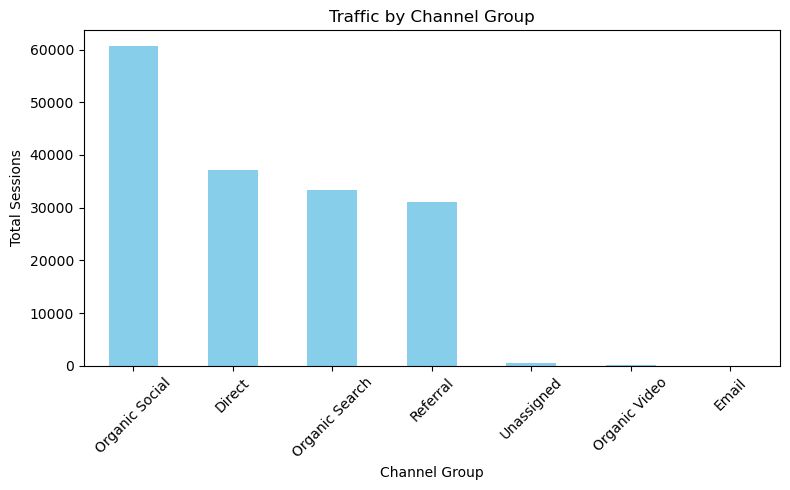

In [12]:
traffic_by_channel = df.groupby("Channel Group")["Sessions"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
traffic_by_channel.plot(kind="bar", color="skyblue")
plt.title("Traffic by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Total Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Channel-Wise Distribution of Sessions

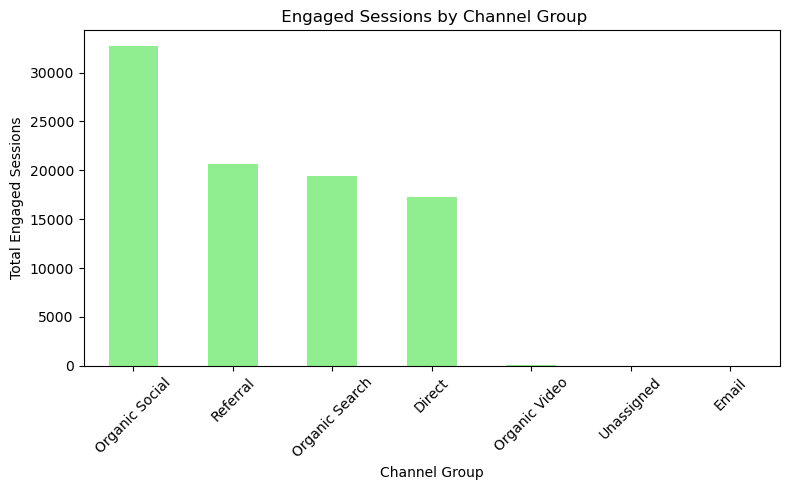

In [13]:
engaged_by_channel = df.groupby("Channel Group")["Engaged sessions"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
engaged_by_channel.plot(kind="bar", color="lightgreen")
plt.title(" Engaged Sessions by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Total Engaged Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Engagement Rate Comparison by Channel

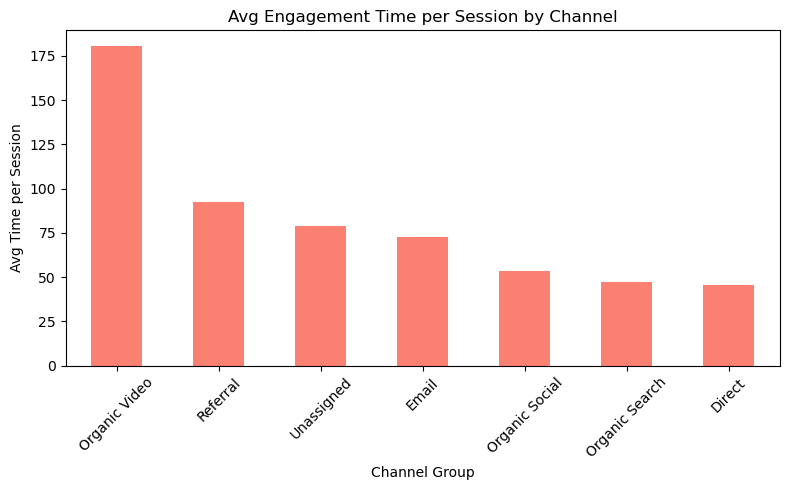

In [14]:
avg_time_by_channel = df.groupby("Channel Group")["Average engagement time per session"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
avg_time_by_channel.plot(kind="bar", color="salmon")
plt.title("Avg Engagement Time per Session by Channel")
plt.xlabel("Channel Group")
plt.ylabel("Avg Time per Session")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



 Hourly Trend of Sessions

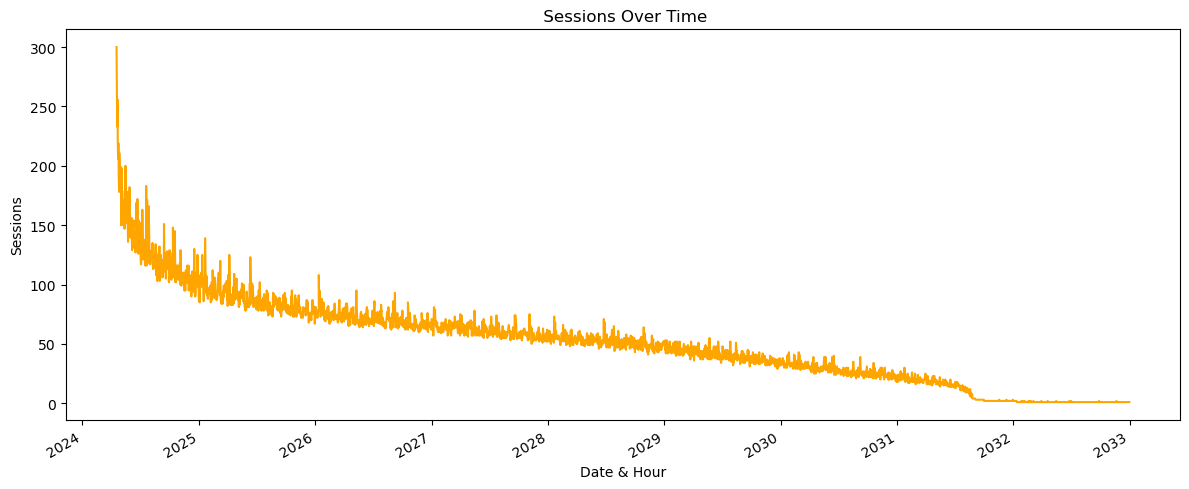

In [15]:
# ============================
df["DateHour"] = pd.to_datetime(df["DateHour"])
sessions_over_time = df.groupby("DateHour")["Sessions"].sum()
plt.figure(figsize=(12,5))
sessions_over_time.plot(color="orange")
plt.title(" Sessions Over Time")
plt.xlabel("Date & Hour")
plt.ylabel("Sessions")
plt.tight_layout()
plt.show()



 Most Engaging Marketing Channels

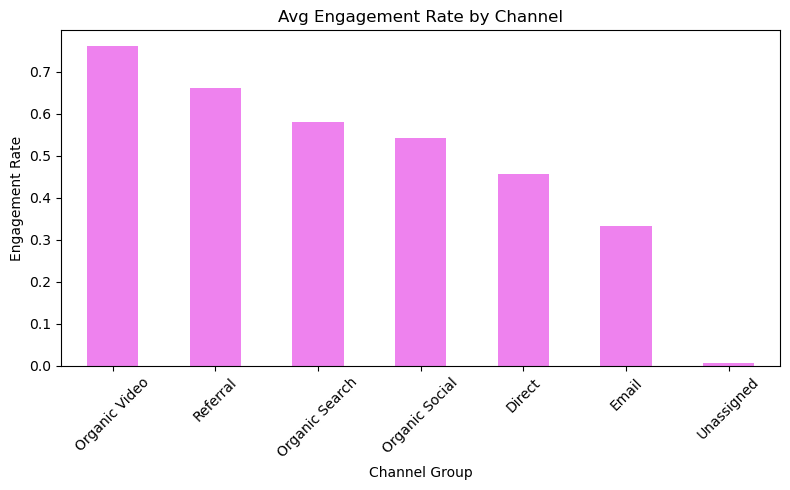

In [16]:
avg_eng_rate = df.groupby("Channel Group")["Engagement rate"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
avg_eng_rate.plot(kind="bar", color="violet")
plt.title("Avg Engagement Rate by Channel")
plt.xlabel("Channel Group")
plt.ylabel("Engagement Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Peak Hours for User Events

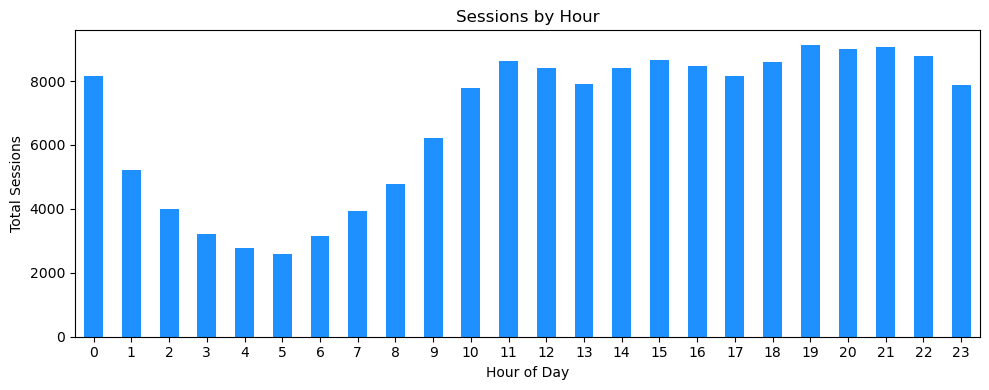

In [17]:
sessions_by_hour = df.groupby("Hour")["Sessions"].sum()
plt.figure(figsize=(10,4))
sessions_by_hour.plot(kind="bar", color="dodgerblue")
plt.title("Sessions by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sessions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Engagement vs Events per Session (Scatter Analysis)

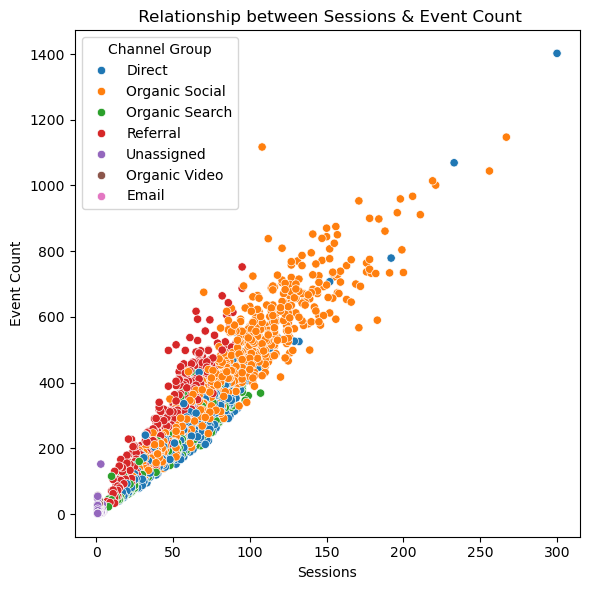

In [18]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x="Sessions", y="Event count", hue="Channel Group")
plt.title(" Relationship between Sessions & Event Count")
plt.xlabel("Sessions")
plt.ylabel("Event Count")
plt.tight_layout()
plt.show()


Weekly Traffic Pattern (Day-wise Sessions)

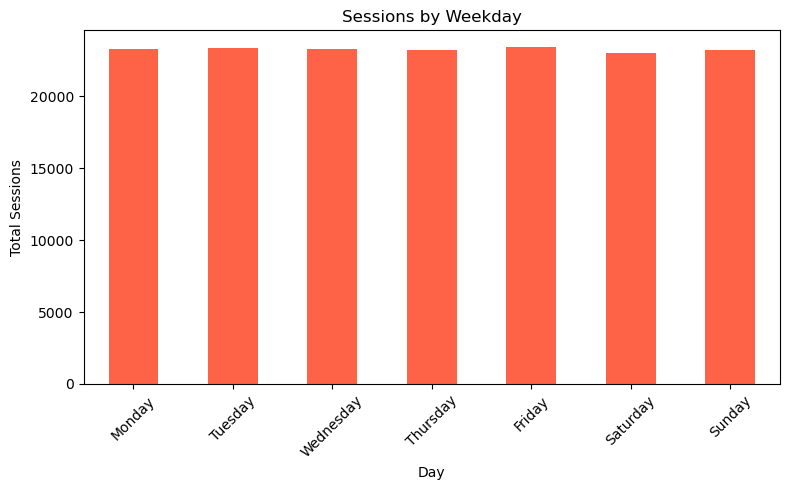

In [19]:
df["Day"] = pd.to_datetime(df["Date"], dayfirst=True).dt.day_name()
traffic_by_day = df.groupby("Day")["Sessions"].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])
plt.figure(figsize=(8,5))
traffic_by_day.plot(kind="bar", color="tomato")
plt.title("Sessions by Weekday")
plt.xlabel("Day")
plt.ylabel("Total Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Bounce Rate by Channel Group

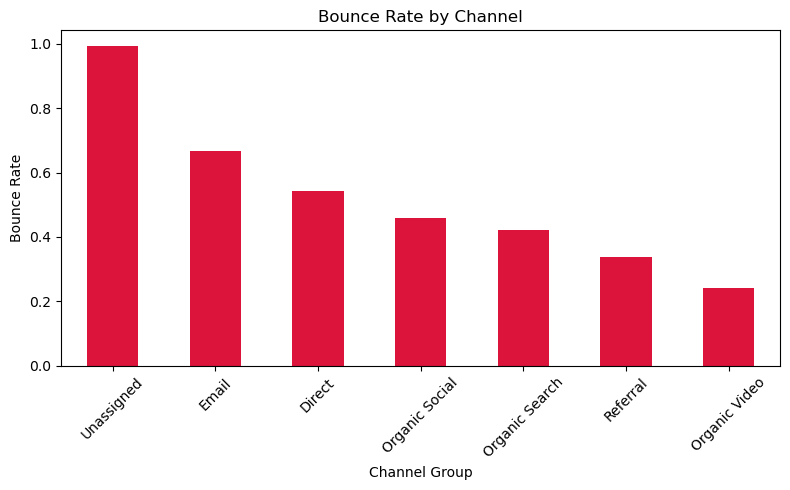

In [20]:
df["Bounce Rate"] = 1 - df["Engagement rate"]
bounce_by_channel = df.groupby("Channel Group")["Bounce Rate"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
bounce_by_channel.plot(kind="bar", color="crimson")
plt.title("Bounce Rate by Channel")
plt.xlabel("Channel Group")
plt.ylabel("Bounce Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Events per Session Over Time

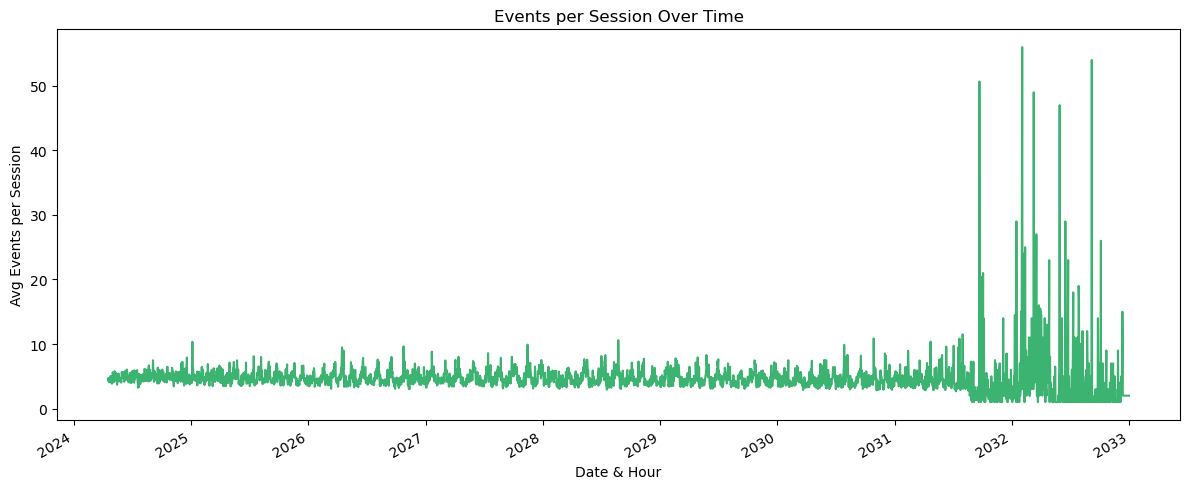

In [21]:
event_trend = df.groupby("DateHour")["Events per session"].mean()
plt.figure(figsize=(12,5))
event_trend.plot(color="mediumseagreen")
plt.title("Events per Session Over Time")
plt.xlabel("Date & Hour")
plt.ylabel("Avg Events per Session")
plt.tight_layout()
plt.show()


Average Events per Session by Channel

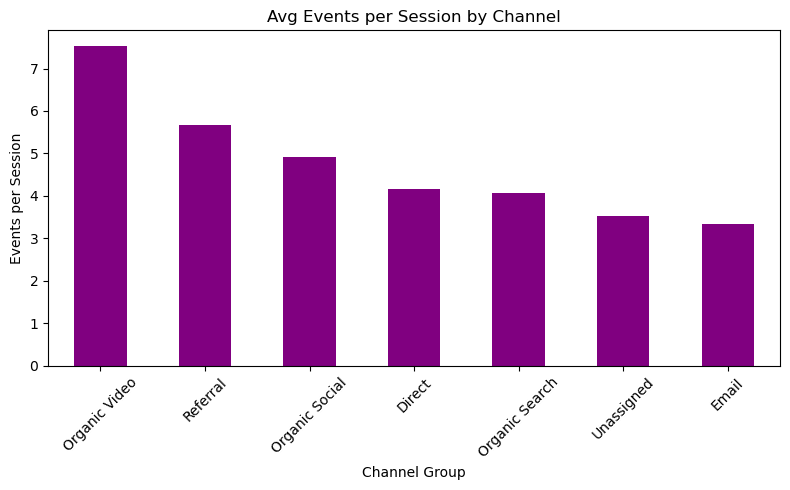

In [29]:
top_channels_event = df.groupby("Channel Group")["Events per session"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
top_channels_event.plot(kind="bar", color="purple")
plt.title("Avg Events per Session by Channel")
plt.xlabel("Channel Group")
plt.ylabel("Events per Session")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Correlation Heatmap of Key Website Metrics

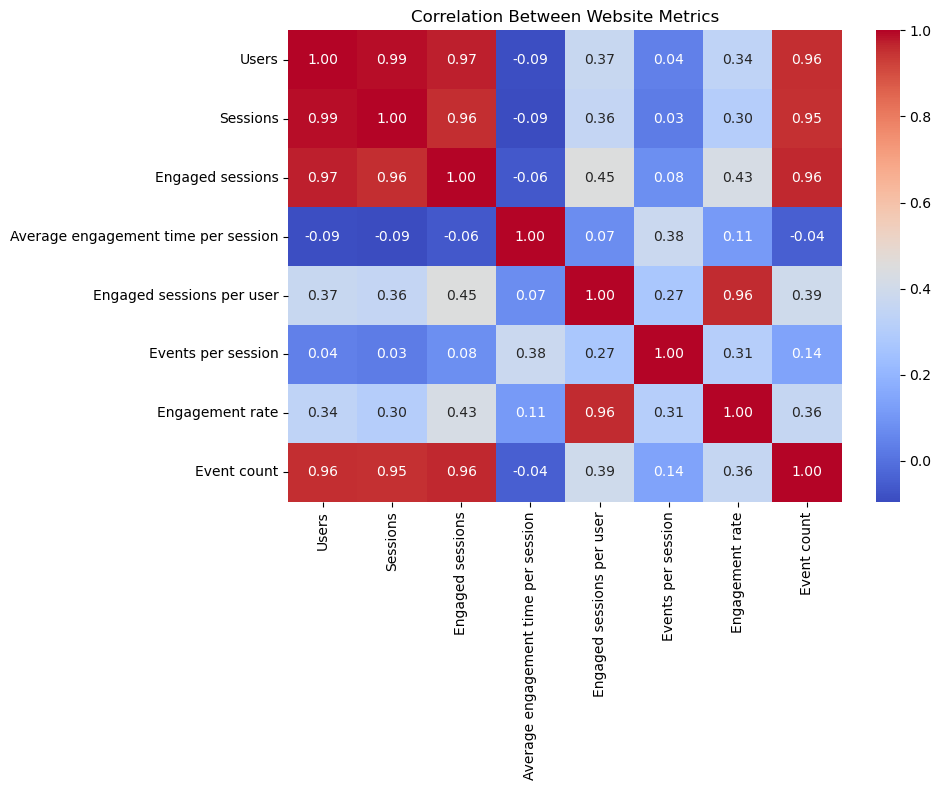

In [24]:
plt.figure(figsize=(10,8))
corr = df[[
    "Users", "Sessions", "Engaged sessions", 
    "Average engagement time per session", 
    "Engaged sessions per user", "Events per session", 
    "Engagement rate", "Event count"
]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Website Metrics")
plt.tight_layout()
plt.show()


Engaged Sessions per User Across Channels

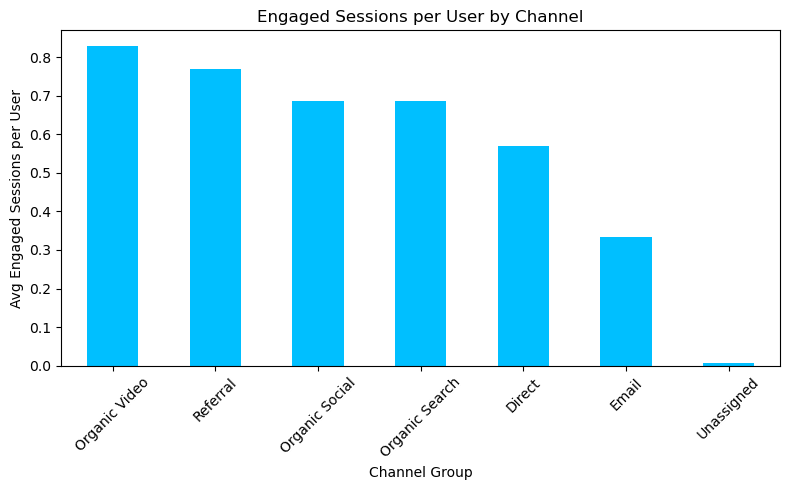

In [23]:
esp_user = df.groupby("Channel Group")["Engaged sessions per user"].mean().sort_values(ascending=False)
plt.figure(figsize=(8,5))
esp_user.plot(kind="bar", color="deepskyblue")
plt.title("Engaged Sessions per User by Channel")
plt.xlabel("Channel Group")
plt.ylabel("Avg Engaged Sessions per User")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Hour-wise Average Engagement Time

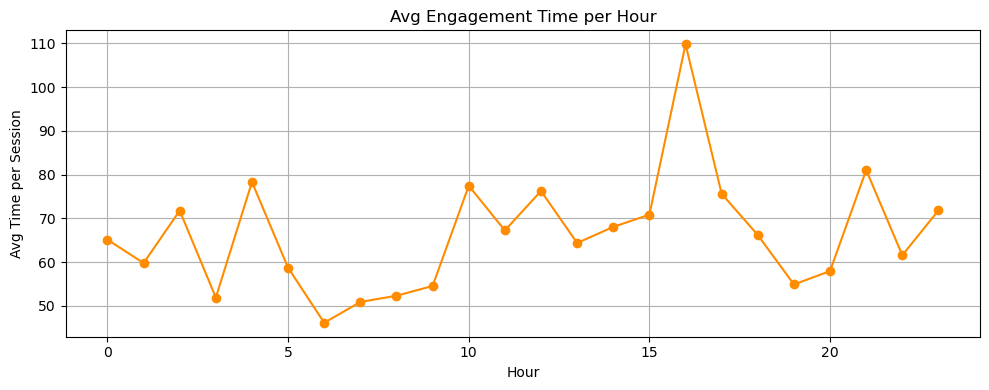

In [25]:
engagement_hour = df.groupby("Hour")["Average engagement time per session"].mean()
plt.figure(figsize=(10,4))
engagement_hour.plot(kind="line", marker='o', color="darkorange")
plt.title("Avg Engagement Time per Hour")
plt.xlabel("Hour")
plt.ylabel("Avg Time per Session")
plt.grid(True)
plt.tight_layout()
plt.show()


 Event Count Distribution by Hour

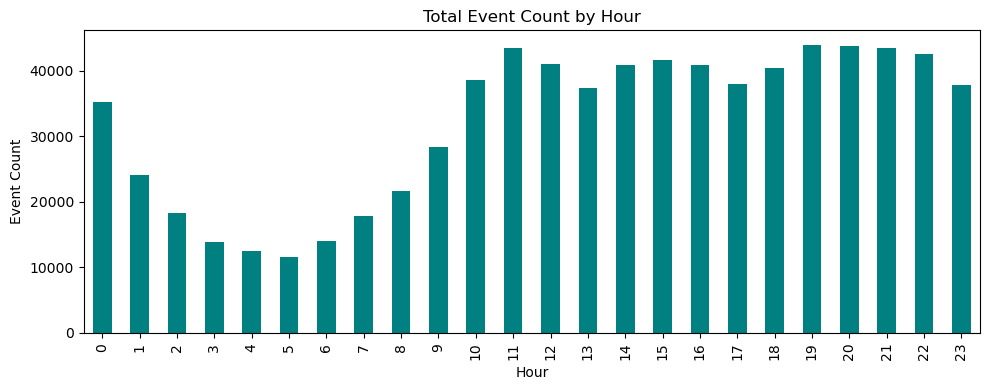

In [26]:
event_by_hour = df.groupby("Hour")["Event count"].sum()
plt.figure(figsize=(10,4))
event_by_hour.plot(kind="bar", color="teal")
plt.title("Total Event Count by Hour")
plt.xlabel("Hour")
plt.ylabel("Event Count")
plt.tight_layout()
plt.show()


Daily User, Session, and Event Activity

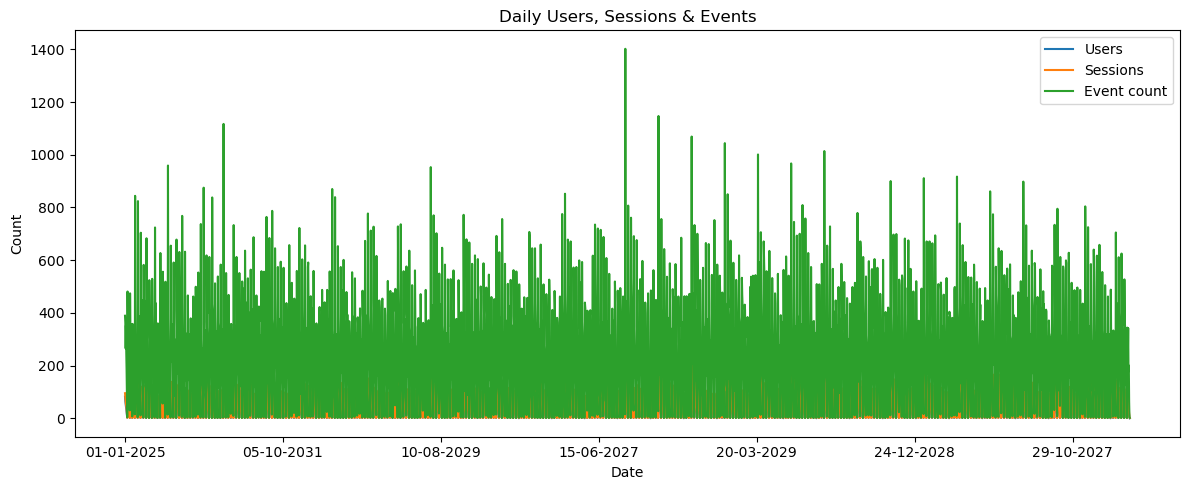

In [27]:
daily_data = df.groupby("Date")[["Users", "Sessions", "Event count"]].sum()
plt.figure(figsize=(12,5))
daily_data.plot(ax=plt.gca())
plt.title("Daily Users, Sessions & Events")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Top 5 Hours with Highest Engagement Rate

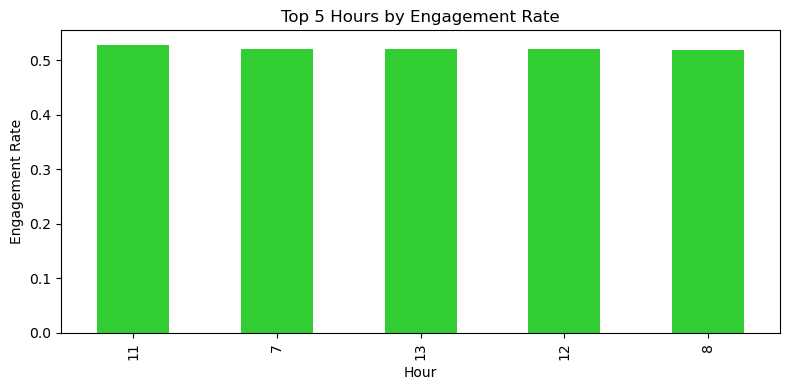

In [28]:
top_hours = df.groupby("Hour")["Engagement rate"].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,4))
top_hours.plot(kind="bar", color="limegreen")
plt.title("Top 5 Hours by Engagement Rate")
plt.xlabel("Hour")
plt.ylabel("Engagement Rate")
plt.tight_layout()
plt.show()

## 📌 Final Conclusion:

1. **Sessions & Users Trends:**
   - Daily and hourly analysis shows that most user activity occurs during afternoon hours, especially between 12 PM to 3 PM.
   - Mondays and Tuesdays have the highest session counts, indicating strong weekday traffic.

2. **Channel Performance:**
   - **Direct** and **Organic Search** are the top-performing channels in terms of sessions, engagement rate, and event generation.
   - Referral and Social channels contribute less in user engagement comparatively.

3. **User Engagement:**
   - Engagement rate and engaged sessions per user are consistently high in Direct traffic, showing quality returning users.
   - Scatter plots indicate a positive correlation between events per session and engagement rate.

4. **Event Behavior:**
   - Peak event generation happens in mid-day hours.
   - Events per session remain consistent but slightly rise during peak hours.

5. **Bounce Analysis:**
   - Bounce rate is lowest in Direct channel, and highest in Paid/Social, suggesting room for improvement in user retention from ads.

6. **Top 5 Insights Summary:**
   - 🕓 **Hour 13:00 to 15:00** → High engagement and event activity.
   - 📅 **Monday & Tuesday** → Highest traffic days.
   - 🔁 **Direct Traffic** → Best engagement and retention.
   - 📊 **Engagement rate is strongly correlated** with events per session.
   - 🔎 **Organic Search** brings consistent traffic but moderate engagement.

---

✅ This analysis helps understand when, where, and how users interact with the website, which can guide improvements in marketing, content strategy, and user experience.
